# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with a data preprocessing and feature engineering step. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - Identifying the implicit missing values of attributes and replacing them with an explicit missing value using [Pandas](https://pandas.pydata.org/docs/user_guide/missing_data.html#missing-data).
    - removing explicit missing values using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html);
    - normalizing/scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [23]:
import pandas as pd
import sklearn.model_selection
import sklearn.preprocessing
import sklearn.compose
import sklearn.svm
import sklearn.metrics

## Defining Problem Statement

## Data Collection

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/main/datasets/adult.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
df_train, df_test = sklearn.model_selection.train_test_split(df)

print("df size:", df.shape)
print("df train size:", df_train.shape)
print("df test size:", df_test.shape)

df size: (32561, 15)
df train size: (24420, 15)
df test size: (8141, 15)


## Data Exploration

In [12]:
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

<Axes: >

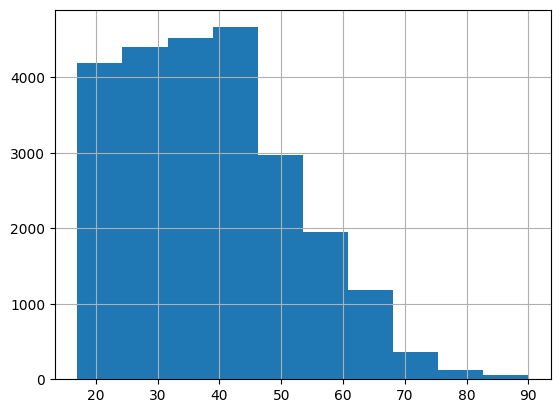

In [13]:
df_train["age"].hist() ## shows the histogram of the age which is int64 datatype

In [14]:
df_train["workclass"].value_counts() ## gives number of unique values in each workclass type, example, private is repeated 17018 times

 Private             17031
 Self-emp-not-inc     1898
 Local-gov            1593
 ?                    1359
 State-gov             981
 Self-emp-inc          858
 Federal-gov           685
 Without-pay             9
 Never-worked            6
Name: workclass, dtype: int64

<Axes: >

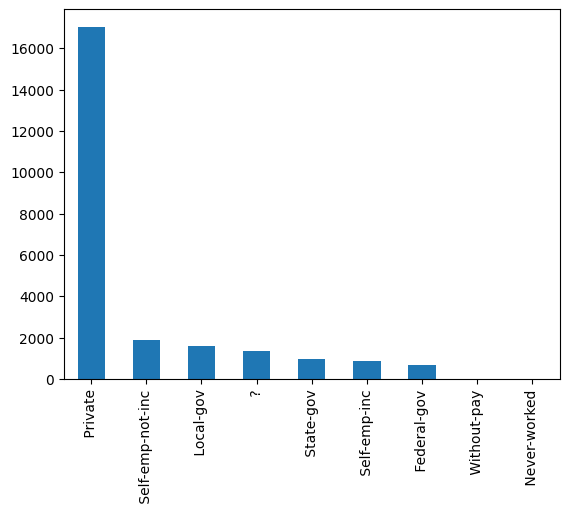

In [15]:
df_train["workclass"].value_counts().plot(kind="bar") ## you can have bar charts for cartegory types, you can use this to find missing values

In [16]:
df_train["workclass"].unique()

array([' Private', ' ?', ' Self-emp-inc', ' State-gov', ' Local-gov',
       ' Self-emp-not-inc', ' Federal-gov', ' Without-pay',
       ' Never-worked'], dtype=object)

In [17]:
df_train["target"].value_counts() ## important to check the distribution of the target label to ensure evenly distribution

 <=50K    18520
 >50K      5900
Name: target, dtype: int64

<Axes: >

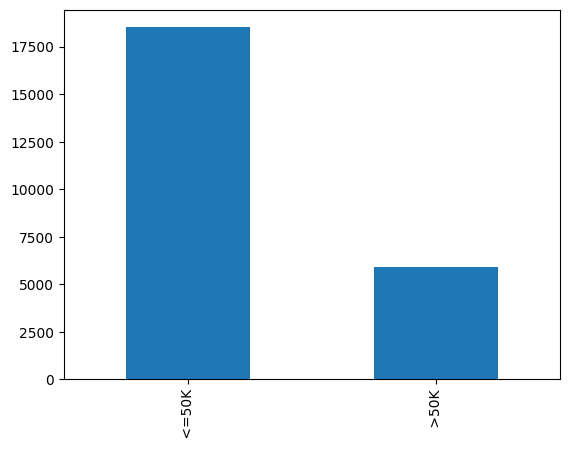

In [18]:
df_train["target"].value_counts().plot(kind="bar")

## Data Preprocessing

In [19]:
# TODO: Get rid of row with implicit missing value which is ?


In [20]:
x_train = df_train.drop("target", axis=1) # this allows us to drop the target column from the dataset with the axis set to 1 for column
y_train = df_train["target"]

x_test = df_test.drop("target", axis=1) # this will represent my input features without the output variable which is the label which is what will be predicted
y_test = df_test["target"]

print("x_train size", x_train.shape)
print("y_train target size", y_train.shape)
print("x_test size", x_test.shape)
print("y_test target size", y_test.shape)

x_train size (24420, 14)
y_train target size (24420,)
x_test size (8141, 14)
y_test target size (8141,)


## Feature Engineering

In [21]:
numerical_attributes = x_train.select_dtypes(include=["int64", "float64"]).columns # x_train variable is input features without labels
categorical_attributes = x_train.select_dtypes(include=["object"]).columns

ct = sklearn.compose.ColumnTransformer([
    ("standard_scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes),
    ("one_hot_encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown="ignore"), categorical_attributes)
])

ct.fit(x_train)
x_train = ct.transform(x_train)
x_test = ct.transform(x_test)

print("x_train size", x_train.shape)
print("x_test size", x_test.shape)

x_train size (24420, 107)
x_test size (8141, 107)


## Model Training

In [22]:
model = sklearn.svm.SVC()
model.fit(x_train, y_train)

SVC()

## Model Assessment

In [24]:
y_predicted = model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted) # what we did here is to test the accuracy between the actual labels of test dataset against the predicted labels
accuracy # print accuracy, the model was able to achieve 86% accuracy

0.8567743520452032